In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

# Load train and test datasets
train = pd.read_csv('/kaggle/input/zindidataset/Train.csv')
test = pd.read_csv('/kaggle/input/zindidataset/Test.csv')

# Check the first few rows
print("Train Dataset:")
print(train.head())
print("\nTest Dataset:")
print(test.head())

Train Dataset:
                      ID  customer_id country_id  tbl_loan_id  lender_id  \
0  ID_266671248032267278       266671      Kenya       248032     267278   
1  ID_248919228515267278       248919      Kenya       228515     267278   
2  ID_308486370501251804       308486      Kenya       370501     251804   
3  ID_266004285009267278       266004      Kenya       285009     267278   
4  ID_253803305312267278       253803      Kenya       305312     267278   

  loan_type  Total_Amount  Total_Amount_to_Repay disbursement_date  \
0    Type_1        8448.0                 8448.0        2022-08-30   
1    Type_1       25895.0                25979.0        2022-07-30   
2    Type_7        6900.0                 7142.0        2024-09-06   
3    Type_1        8958.0                 9233.0        2022-10-20   
4    Type_1        4564.0                 4728.0        2022-11-28   

     due_date  duration New_versus_Repeat  Amount_Funded_By_Lender  \
0  2022-09-06         7       Repeat 

In [2]:
# Check the shape of the datasets
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Check for missing values
print("\nMissing Values in Train:")
print(train.isnull().sum())
print("\nMissing Values in Test:")
print(test.isnull().sum())

# Check data types
print("\nTrain Data Types:")
print(train.dtypes)

print("\nTest Data Types:")
print(test.dtypes)

# Descriptive statistics for numerical features
print("\nTrain Numerical Summary:")
print(train.describe())

print("\nTest Numerical Summary:")
print(test.describe())

Train shape: (68654, 16)
Test shape: (18594, 15)

Missing Values in Train:
ID                             0
customer_id                    0
country_id                     0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
target                         0
dtype: int64

Missing Values in Test:
ID                             0
customer_id                    0
country_id                     0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                     

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check if all entries in ID column are unique
id_unique = train['ID'].is_unique
print(f"Are all IDs unique? {id_unique}")

Are all IDs unique? True


In [4]:
# Check uniqueness of customer_id and its levels
customer_id_levels = train['customer_id'].nunique()
print(f"Number of unique levels in customer_id: {customer_id_levels}")

Number of unique levels in customer_id: 6540


In [5]:
# Check uniqueness of lender_id and its levels
lender_id_levels = train['lender_id'].nunique()
print(f"Number of unique levels in lender_id: {lender_id_levels}")

Number of unique levels in lender_id: 4


In [6]:
# Check levels of loan_type
loan_type_levels = train['loan_type'].value_counts()
print(f"Levels in loan_type:\n{loan_type_levels}")

Levels in loan_type:
loan_type
Type_1     61723
Type_7      2790
Type_5      1521
Type_4      1235
Type_10      466
Type_6       357
Type_9       205
Type_14       99
Type_2        74
Type_11       42
Type_18       30
Type_17       23
Type_12       21
Type_23       18
Type_20       13
Type_16       12
Type_13       10
Type_19        4
Type_15        4
Type_21        3
Type_24        3
Type_22        1
Name: count, dtype: int64


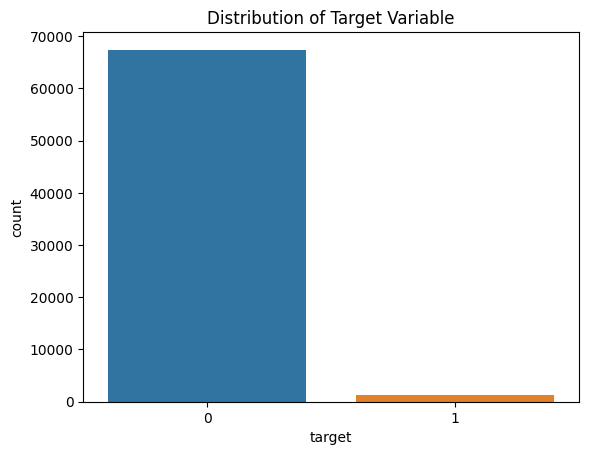

In [7]:
# Plot imbalance in the target column
sns.countplot(x='target', data=train)
plt.title("Distribution of Target Variable")
plt.show()

In [9]:
# Check levels of the duration column
duration_levels = train['duration'].value_counts()
print(f"Levels in duration:\n{duration_levels}")

Levels in duration:
duration
7      64973
14      1567
30       958
90       249
60       201
       ...  
912        1
366        1
12         1
273        1
243        1
Name: count, Length: 64, dtype: int64


                             customer_id  tbl_loan_id  lender_id  \
customer_id                     1.000000     0.241670  -0.094086   
tbl_loan_id                     0.241670     1.000000  -0.099092   
lender_id                      -0.094086    -0.099092   1.000000   
Total_Amount                    0.000880     0.016275  -0.064935   
Total_Amount_to_Repay           0.001162     0.015313  -0.062589   
duration                       -0.005274     0.059921  -0.206143   
Amount_Funded_By_Lender        -0.004126     0.004764  -0.074546   
Lender_portion_Funded          -0.031184    -0.213029  -0.016221   
Lender_portion_to_be_repaid    -0.003058     0.009076  -0.074143   
target                          0.030659     0.035068  -0.166202   

                             Total_Amount  Total_Amount_to_Repay  duration  \
customer_id                      0.000880               0.001162 -0.005274   
tbl_loan_id                      0.016275               0.015313  0.059921   
lender_id        

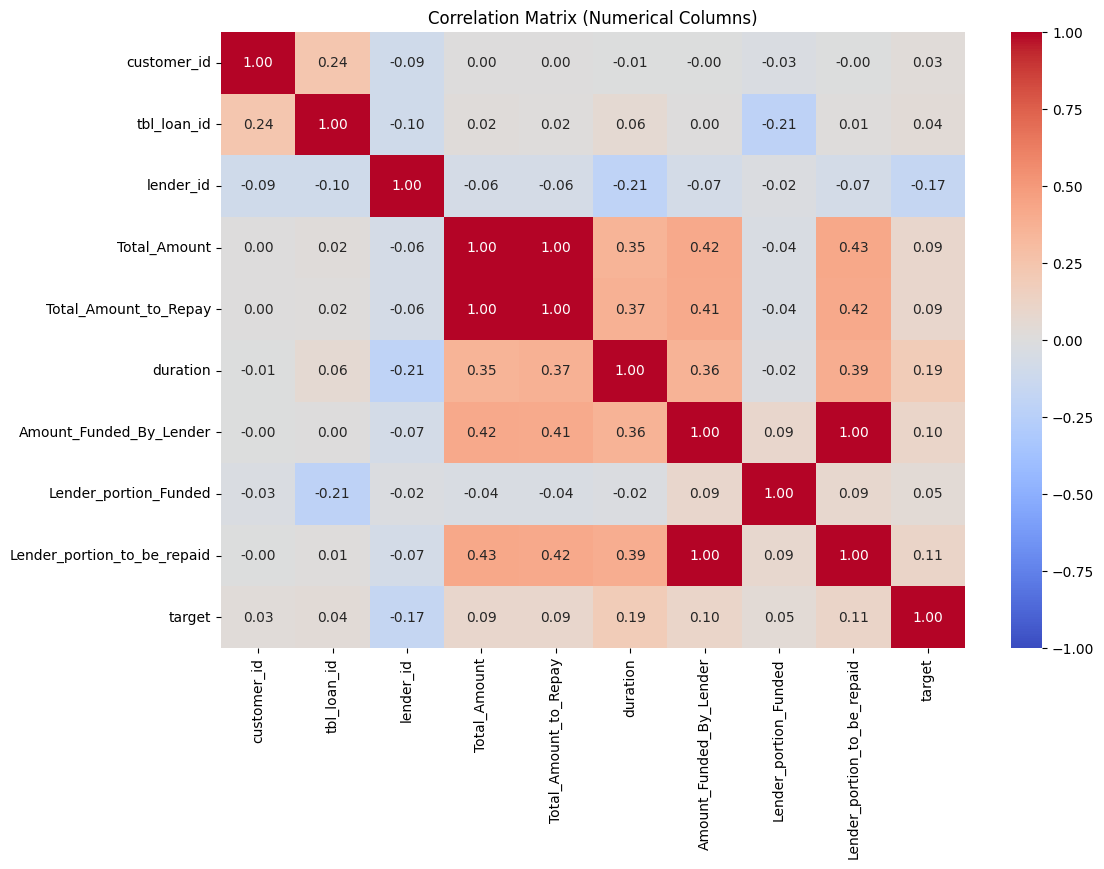

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your dataset after any necessary preprocessing
# Filter only the numerical columns
numerical_data = train.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix (Numerical Columns)")
plt.show()

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding 'loan_type' and 'New_Versus_Repeat' using LabelEncoder
label_encoder = LabelEncoder()

# Encode 'loan_type' column
train['loan_type'] = label_encoder.fit_transform(train['loan_type'])

# Encode 'New_versus_Repeat' column
train['New_versus_Repeat'] = label_encoder.fit_transform(train['New_versus_Repeat'])

In [19]:
# 3. Scaling numerical columns using StandardScaler
numerical_columns = ['Total_Amount', 'Total_Amount_to_Repay', 'Amount_Funded_By_Lender', 
                     'Lender_portion_Funded', 'Lender_portion_to_be_repaid']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])

# 4. Display the updated data
print(train.head())

                      ID  customer_id country_id  tbl_loan_id  lender_id  \
0  ID_266671248032267278       266671      Kenya       248032     267278   
1  ID_248919228515267278       248919      Kenya       228515     267278   
2  ID_308486370501251804       308486      Kenya       370501     251804   
3  ID_266004285009267278       266004      Kenya       285009     267278   
4  ID_253803305312267278       253803      Kenya       305312     267278   

   loan_type  Total_Amount  Total_Amount_to_Repay disbursement_date  \
0          0     -0.045103              -0.043567        2022-08-30   
1          0      0.078068               0.062632        2022-07-30   
2         20     -0.056032              -0.051479        2024-09-06   
3          0     -0.041503              -0.038812        2022-10-20   
4          0     -0.072523              -0.066102        2022-11-28   

     due_date  duration  New_versus_Repeat  Amount_Funded_By_Lender  \
0  2022-09-06         7                  1   